### Importing packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Moudles related to feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [2]:
df = pd.read_csv("E:\datasets\loans_full_schema.csv")

In [3]:
df.head(10)

emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   
5                      NaN         NaN    KY           OWN        34000.0   
6                      hr         10.0    MI      MORTGAGE        35000.0   
7                   police        10.0    AZ      MORTGAGE       110000.0   
8                    parts        10.0    NV      MORTGAGE        65000.0   
9               4th person         3.0    IL          RENT        30000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   
5     Not Verified            6.46                  NaN   
6  Source Verified           23.66             155000.0   
7  Source Verified           16.19                  NaN   
8  Source Verified           36.48                  NaN   
9     Not Verified           18.91                  NaN   

  verification_income_joint  debt_to_income_joint  ...  sub_grade  \
0                       NaN                   NaN  ...         C3   
1                       NaN                   NaN  ...         C1   
2                       NaN                   NaN  ...         D1   
3                       NaN                   NaN  ...         A3   
4                  Verified                 37.66  ...         C3   
5                       NaN                   NaN  ...         A3   
6              Not Verified                 13.12  ...         C2   
7                       NaN                   NaN  ...         B5   
8                       NaN                   NaN  ...         C2   
9                       NaN                   NaN  ...         A3   

   issue_month  loan_status  initial_listing_status  disbursement_method  \
0     Mar-2018      Current                   whole                 Cash   
1     Feb-2018      Current                   whole                 Cash   
2     Feb-2018      Current              fractional                 Cash   
3     Jan-2018      Current                   whole                 Cash   
4     Mar-2018      Current                   whole                 Cash   
5     Jan-2018      Current                   whole                 Cash   
6     Jan-2018      Current                   whole                 Cash   
7     Jan-2018      Current                   whole                 Cash   
8     Feb-2018      Current                   whole                 Cash   
9     Mar-2018      Current              fractional                 Cash   

    balance  paid_total  paid_principal  paid_interest  paid_late_fees  
0  27015.86     1999.33          984.14        1015.19             0.0  
1   4651.37      499.12          348.63         150.49             0.0  
2   1824.63      281.80          175.37         106.43             0.0  
3  18853.26     3312.89         2746.74         566.15             0.0  
4  21430.15     2324.65         1569.85         754.80             0.0  
5   4256.71      873.13          743.29         129.84             0.0  
6  22560.00     2730.51         1440.00        1290.51             0.0  
7  19005.39     1765.84          994.61         771.23             0.0  
8  18156.66     2703.22         1843.34         859.88             0.0  
9   6077.13      391.15          322.87          68.28             0.0  

[10 rows x 55 columns]

In [4]:
df.rename(columns={'public_record_bankrupt':"default"},inplace = True)

In [5]:
df.default.value_counts()

default
0    8785
1    1195
2      17
3       3
Name: count, dtype: int64

In [6]:
df['default'] = df['default'].apply(lambda x: 0 if x == 0 else 1)

In [7]:
df.default.value_counts()

default
0    8785
1    1215
Name: count, dtype: int64

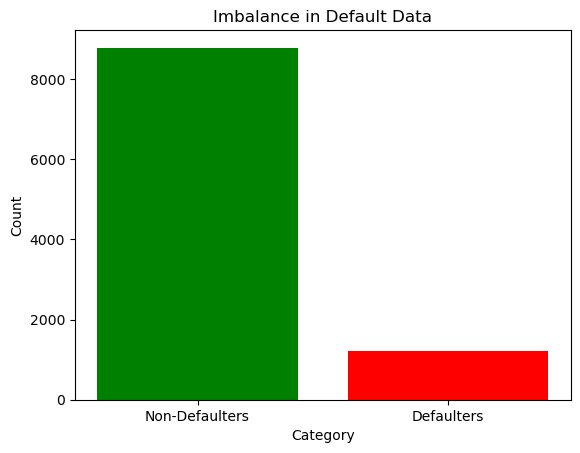

In [8]:
# Count the occurrences of each value in the 'default' column
default_counts = df['default'].value_counts()

# Bar chart
categories = ['Non-Defaulters', 'Defaulters']
values = [default_counts[0], default_counts[1]]
colors = ['green', 'red']

plt.bar(categories, values, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Imbalance in Default Data')
plt.show()

### Data inspection

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [10]:
df.describe()

emp_length  annual_income  debt_to_income  annual_income_joint  \
count  9183.000000   1.000000e+04     9976.000000         1.495000e+03   
mean      5.930306   7.922215e+04       19.308192         1.279146e+05   
std       3.703734   6.473429e+04       15.004851         7.016838e+04   
min       0.000000   0.000000e+00        0.000000         1.920000e+04   
25%       2.000000   4.500000e+04       11.057500         8.683350e+04   
50%       6.000000   6.500000e+04       17.570000         1.130000e+05   
75%      10.000000   9.500000e+04       25.002500         1.515455e+05   
max      10.000000   2.300000e+06      469.090000         1.100000e+06   

       debt_to_income_joint    delinq_2y  months_since_last_delinq  \
count           1495.000000  10000.00000               4342.000000   
mean              19.979304      0.21600                 36.760709   
std                8.054781      0.68366                 21.634939   
min                0.320000      0.00000                  1.000000   
25%               14.160000      0.00000                 19.000000   
50%               19.720000      0.00000                 34.000000   
75%               25.500000      0.00000                 53.000000   
max               39.980000     13.00000                118.000000   

       earliest_credit_line  inquiries_last_12m  total_credit_lines  ...  \
count           10000.00000         10000.00000        10000.000000  ...   
mean             2001.29000             1.95820           22.679600  ...   
std                 7.79551             2.38013           11.885439  ...   
min              1963.00000             0.00000            2.000000  ...   
25%              1997.00000             0.00000           14.000000  ...   
50%              2003.00000             1.00000           21.000000  ...   
75%              2006.00000             3.00000           29.000000  ...   
max              2015.00000            29.00000           87.000000  ...   

            default   loan_amount          term  interest_rate   installment  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean       0.121500  16361.922500     43.272000      12.427524    476.205323   
std        0.326724  10301.956759     11.029877       5.001105    294.851627   
min        0.000000   1000.000000     36.000000       5.310000     30.750000   
25%        0.000000   8000.000000     36.000000       9.430000    256.040000   
50%        0.000000  14500.000000     36.000000      11.980000    398.420000   
75%        0.000000  24000.000000     60.000000      15.050000    644.690000   
max        1.000000  40000.000000     60.000000      30.940000   1566.590000   

            balance    paid_total  paid_principal  paid_interest  \
count  10000.000000  10000.000000    10000.000000   10000.000000   
mean   14458.916610   2494.234773     1894.448466     599.666781   
std     9964.561865   3958.230365     3884.407175     517.328062   
min        0.000000      0.000000        0.000000       0.000000   
25%     6679.065000    928.700000      587.100000     221.757500   
50%    12379.495000   1563.300000      984.990000     446.140000   
75%    20690.182500   2616.005000     1694.555000     825.420000   
max    40000.000000  41630.443684    40000.000000    4216.440000   

       paid_late_fees  
count    10000.000000  
mean         0.119516  
std          1.813468  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max         52.980000  

[8 rows x 42 columns]

In [11]:
df.nunique()

emp_title                           4741
emp_length                            11
state                                 50
homeownership                          3
annual_income                       1463
verified_income                        3
debt_to_income                      3673
annual_income_joint                  596
verification_income_joint              3
debt_to_income_joint                1189
delinq_2y                             12
months_since_last_delinq              97
earliest_credit_line                  53
inquiries_last_12m                    26
total_credit_lines                    78
open_credit_lines                     45
total_credit_limit                  9119
total_credit_utilized               9497
num_collections_last_12m               4
num_historical_failed_to_pay           9
months_since_90d_late                106
current_accounts_delinq                2
total_collection_amount_ever         896
current_installment_accounts          30
accounts_opened_

In [12]:
df.shape

(10000, 55)

In [13]:
df.isna().sum() / df.shape[0] * 100

emp_title                            8.33
emp_length                           8.17
state                                0.00
homeownership                        0.00
annual_income                        0.00
verified_income                      0.00
debt_to_income                       0.24
annual_income_joint                 85.05
verification_income_joint           85.45
debt_to_income_joint                85.05
delinq_2y                            0.00
months_since_last_delinq            56.58
earliest_credit_line                 0.00
inquiries_last_12m                   0.00
total_credit_lines                   0.00
open_credit_lines                    0.00
total_credit_limit                   0.00
total_credit_utilized                0.00
num_collections_last_12m             0.00
num_historical_failed_to_pay         0.00
months_since_90d_late               77.15
current_accounts_delinq              0.00
total_collection_amount_ever         0.00
current_installment_accounts      

In [14]:
### dropping collumns with more than 20% missing values
df.drop(columns= ['annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late'],inplace = True)

### UDF's

In [15]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.dtype, x.nunique(), x.isna().count(), x.count(), x.isna().sum(), 
                              x.isna().sum()/x.isna().count(), 
                          x.sum(), x.mean(), x.std(), x.var(), 
            x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.1), 
                      x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.90),
                      x.quantile(0.95), x.quantile(0.99), x.max()],
            index = ['dtype', 'unique', 'Total Records', 'n', 'nmiss', '% nmiss', 'sum', 
                     'mean', 'std', 'var', 'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 
                         'p90', 'p95', 'p99', 'max'])

In [16]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [17]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [18]:
df_int = df.select_dtypes(exclude ='object')
df_obj = df.select_dtypes(include ='object')

In [19]:
df_int.head()

emp_length  annual_income  debt_to_income  delinq_2y  earliest_credit_line  \
0         3.0        90000.0           18.01          0                  2001   
1        10.0        40000.0            5.04          0                  1996   
2         3.0        40000.0           21.15          0                  2006   
3         1.0        30000.0           10.16          0                  2007   
4        10.0        35000.0           57.96          0                  2008   

   inquiries_last_12m  total_credit_lines  open_credit_lines  \
0                   6                  28                 10   
1                   1                  30                 14   
2                   4                  31                 10   
3                   0                   4                  4   
4                   7                  22                 16   

   total_credit_limit  total_credit_utilized  ...  default  loan_amount  term  \
0               70795                  38767  ...        0        28000    60   
1               28800                   4321  ...        1         5000    36   
2               24193                  16000  ...        0         2000    36   
3               25400                   4997  ...        0        21600    36   
4               69839                  52722  ...        0        23000    36   

   interest_rate  installment   balance  paid_total  paid_principal  \
0          14.07       652.53  27015.86     1999.33          984.14   
1          12.61       167.54   4651.37      499.12          348.63   
2          17.09        71.40   1824.63      281.80          175.37   
3           6.72       664.19  18853.26     3312.89         2746.74   
4          14.07       786.87  21430.15     2324.65         1569.85   

   paid_interest  paid_late_fees  
0        1015.19             0.0  
1         150.49             0.0  
2         106.43             0.0  
3         566.15             0.0  
4         754.80             0.0  

[5 rows x 38 columns]

In [20]:
df_obj.head()

emp_title state homeownership  verified_income  \
0  global config engineer     NJ      MORTGAGE         Verified   
1   warehouse office clerk    HI          RENT     Not Verified   
2                 assembly    WI          RENT  Source Verified   
3         customer service    PA          RENT     Not Verified   
4     security supervisor     CA          RENT         Verified   

         loan_purpose application_type grade sub_grade issue_month  \
0              moving       individual     C        C3    Mar-2018   
1  debt_consolidation       individual     C        C1    Feb-2018   
2               other       individual     D        D1    Feb-2018   
3  debt_consolidation       individual     A        A3    Jan-2018   
4         credit_card            joint     C        C3    Mar-2018   

  loan_status initial_listing_status disbursement_method  
0     Current                  whole                Cash  
1     Current                  whole                Cash  
2     Current             fractional                Cash  
3     Current                  whole                Cash  
4     Current                  whole                Cash

In [21]:
df_int.apply(continuous_var_summary)

emp_length      annual_income debt_to_income delinq_2y  \
dtype            float64            float64        float64     int64   
unique                11               1463           3673        12   
Total Records      10000              10000          10000     10000   
n                   9183              10000           9976     10000   
nmiss                817                  0             24         0   
% nmiss           0.0817                0.0         0.0024       0.0   
sum              54458.0       792221484.12      192618.52      2160   
mean            5.930306       79222.148412      19.308192     0.216   
std             3.703734       64734.290492      15.004851   0.68366   
var            13.717643  4190528365.472091     225.145563  0.467391   
min                  0.0                0.0            0.0         0   
p1                   0.0           13163.76           0.84       0.0   
p5                   0.0            25000.0           3.76       0.0   
p10                  1.0            32000.0          6.125       0.0   
p25                  2.0            45000.0        11.0575       0.0   
p50                  6.0            65000.0          17.57       0.0   
p75                 10.0            95000.0        25.0025       0.0   
p90                 10.0           135000.0         32.375       1.0   
p95                 10.0           175000.0        37.2325       1.0   
p99                 10.0           300000.0        58.6275       3.0   
max                 10.0          2300000.0         469.09        13   

              earliest_credit_line inquiries_last_12m total_credit_lines  \
dtype                        int64              int64              int64   
unique                          53                 26                 78   
Total Records                10000              10000              10000   
n                            10000              10000              10000   
nmiss                            0                  0                  0   
% nmiss                        0.0                0.0                0.0   
sum                       20012900              19582             226796   
mean                       2001.29             1.9582            22.6796   
std                        7.79551            2.38013          11.885439   
var                      60.769977           5.665019          141.26367   
min                           1963                  0                  2   
p1                          1977.0                0.0                4.0   
p5                          1986.0                0.0                7.0   
p10                         1990.0                0.0                9.0   
p25                         1997.0                0.0               14.0   
p50                         2003.0                1.0               21.0   
p75                         2006.0                3.0               29.0   
p90                         2010.0                5.0               39.0   
p95                         2012.0                7.0               45.0   
p99                         2014.0               11.0               59.0   
max                           2015                 29                 87   

              open_credit_lines  total_credit_limit total_credit_utilized  \
dtype                     int64               int64                 int64   
unique                       45                9119                  9497   
Total Records             10000               10000                 10000   
n                         10000               10000                 10000   
nmiss                         0                   0                     0   
% nmiss                     0.0                 0.0                   0.0   
sum                      114044          1836062304             510490631   
mean                    11.4044         183606.2304            51049.0631   
std                     5.86828       187632.707777          53

In [22]:
# Handling Outliers
df_int = df_int.apply(lambda x: x.clip(lower = x.quantile(0.01), 
                                                     upper = x.quantile(0.99)))

In [23]:
df_int.apply(continuous_var_summary)

emp_length      annual_income debt_to_income delinq_2y  \
dtype            float64            float64        float64     int64   
unique                11               1369           3524         4   
Total Records      10000              10000          10000     10000   
n                   9183              10000           9976     10000   
nmiss                817                  0             24         0   
% nmiss           0.0817                0.0         0.0024       0.0   
sum              54458.0       776765331.12      187950.28      1992   
mean            5.930306       77676.533112      18.840245    0.1992   
std             3.703734       49127.015726      10.754155  0.551498   
var            13.717643  2413463674.172763     115.651857   0.30415   
min                  0.0           13163.76           0.84         0   
p1                   0.0         13163.9976           0.84       0.0   
p5                   0.0            25000.0           3.76       0.0   
p10                  1.0            32000.0          6.125       0.0   
p25                  2.0            45000.0        11.0575       0.0   
p50                  6.0            65000.0          17.57       0.0   
p75                 10.0            95000.0        25.0025       0.0   
p90                 10.0           135000.0         32.375       1.0   
p95                 10.0           175000.0        37.2325       1.0   
p99                 10.0           300000.0      58.554375       3.0   
max                 10.0           300000.0        58.6275         3   

              earliest_credit_line inquiries_last_12m total_credit_lines  \
dtype                        int64              int64              int64   
unique                          38                 12                 56   
Total Records                10000              10000              10000   
n                            10000              10000              10000   
nmiss                            0                  0                  0   
% nmiss                        0.0                0.0                0.0   
sum                       20013282              19306             226170   
mean                     2001.3282             1.9306             22.617   
std                       7.649349            2.22865          11.622419   
var                      58.512536            4.96688         135.080619   
min                           1977                  0                  4   
p1                          1977.0                0.0                4.0   
p5                          1986.0                0.0                7.0   
p10                         1990.0                0.0                9.0   
p25                         1997.0                0.0               14.0   
p50                         2003.0                1.0               21.0   
p75                         2006.0                3.0               29.0   
p90                         2010.0                5.0               39.0   
p95                         2012.0                7.0               45.0   
p99                         2014.0               11.0               59.0   
max                           2014                 11                 59   

              open_credit_lines  total_credit_limit total_credit_utilized  \
dtype                     int64             float64               float64   
unique                       29                8966                  9327   
Total Records             10000               10000                 10000   
n                         10000               10000                 10000   
nmiss                         0                   0                     0   
% nmiss                     0.0                 0.0                   0.0   
sum                      113630        1808423276.0           500118336.0   
mean                     11.363         180842.3276            50011.8336   
std                    5.696637        171325.50624          46

In [24]:
df_obj.apply(categorical_var_summary)

emp_title  state homeownership  verified_income        loan_purpose  \
N            9167  10000         10000            10000               10000   
NMISS         833      0             0                0                   0   
MODE      manager     CA      MORTGAGE  Source Verified  debt_consolidation   
FREQ          218   1330          4789             4116                5144   
PERCENT      2.38   13.3         47.89            41.16               51.44   

        application_type  grade sub_grade issue_month loan_status  \
N                  10000  10000     10000       10000       10000   
NMISS                  0      0         0           0           0   
MODE          individual      B        B1    Mar-2018     Current   
FREQ                8505   3037       647        3617        9375   
PERCENT            85.05  30.37      6.47       36.17       93.75   

        initial_listing_status disbursement_method  
N                        10000               10000  
NMISS                        0                   0  
MODE                     whole                Cash  
FREQ                      8206                9284  
PERCENT                  82.06               92.84

### Missing value treatment

In [25]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [26]:
df_int = df_int.apply(missing_imputation)

In [27]:
df_int.isna().sum() / df_int.shape[0] * 100

emp_length                          0.0
annual_income                       0.0
debt_to_income                      0.0
delinq_2y                           0.0
earliest_credit_line                0.0
inquiries_last_12m                  0.0
total_credit_lines                  0.0
open_credit_lines                   0.0
total_credit_limit                  0.0
total_credit_utilized               0.0
num_collections_last_12m            0.0
num_historical_failed_to_pay        0.0
current_accounts_delinq             0.0
total_collection_amount_ever        0.0
current_installment_accounts        0.0
accounts_opened_24m                 0.0
months_since_last_credit_inquiry    0.0
num_satisfactory_accounts           0.0
num_accounts_120d_past_due          0.0
num_accounts_30d_past_due           0.0
num_active_debit_accounts           0.0
total_debit_limit                   0.0
num_total_cc_accounts               0.0
num_open_cc_accounts                0.0
num_cc_carrying_balance             0.0


In [28]:
### filling missing value of job tittle with its MODE
df_obj.emp_title.fillna(value = 'manager',inplace= True )

In [29]:
df_obj.isna().sum() / df_obj.shape[0] * 100

emp_title                 0.0
state                     0.0
homeownership             0.0
verified_income           0.0
loan_purpose              0.0
application_type          0.0
grade                     0.0
sub_grade                 0.0
issue_month               0.0
loan_status               0.0
initial_listing_status    0.0
disbursement_method       0.0
dtype: float64

### EDA

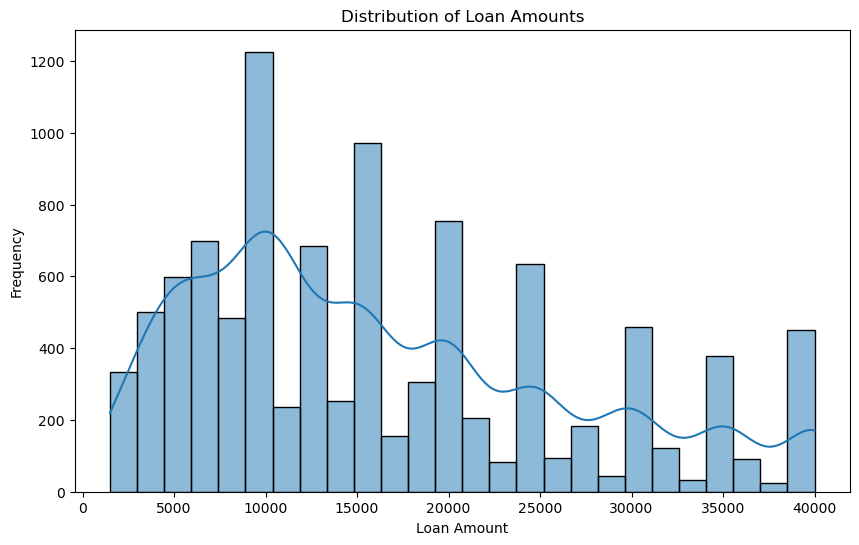

In [30]:
# Histogram of Loan Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_int['loan_amount'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


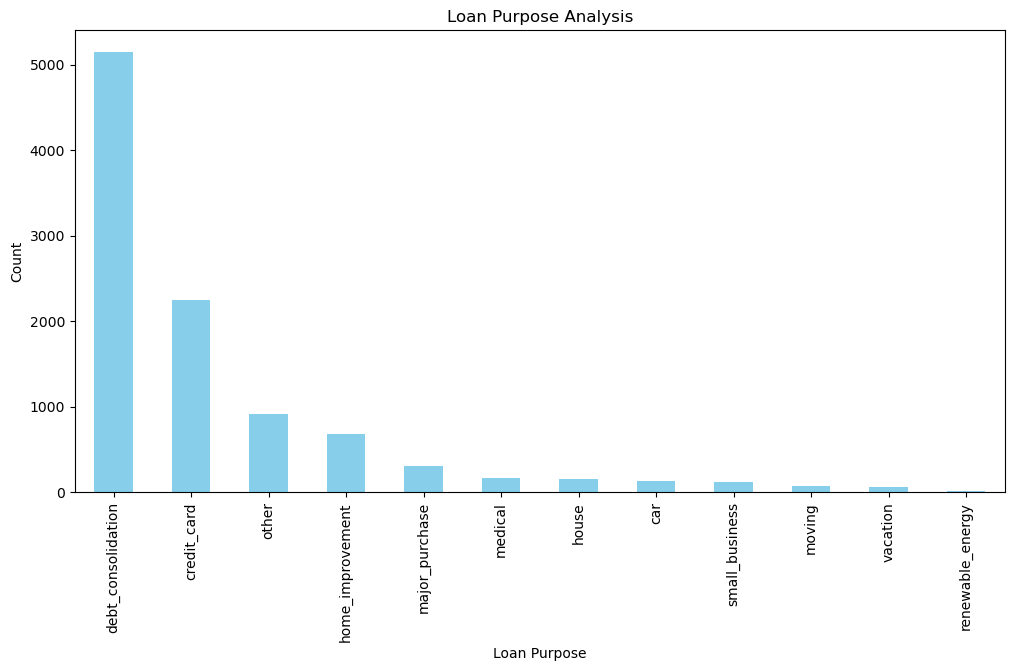

In [31]:
plt.figure(figsize=(12, 6))
df_obj['loan_purpose'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Loan Purpose Analysis')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.show()

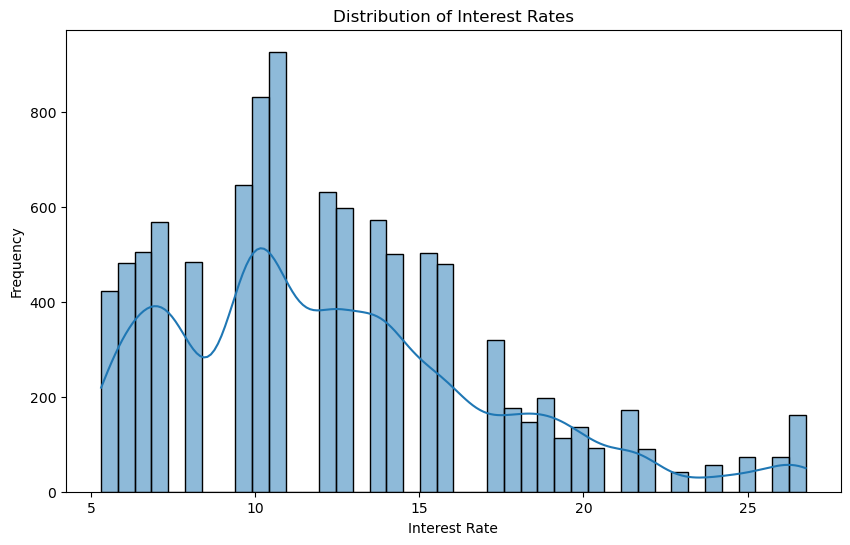

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df_int['interest_rate'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

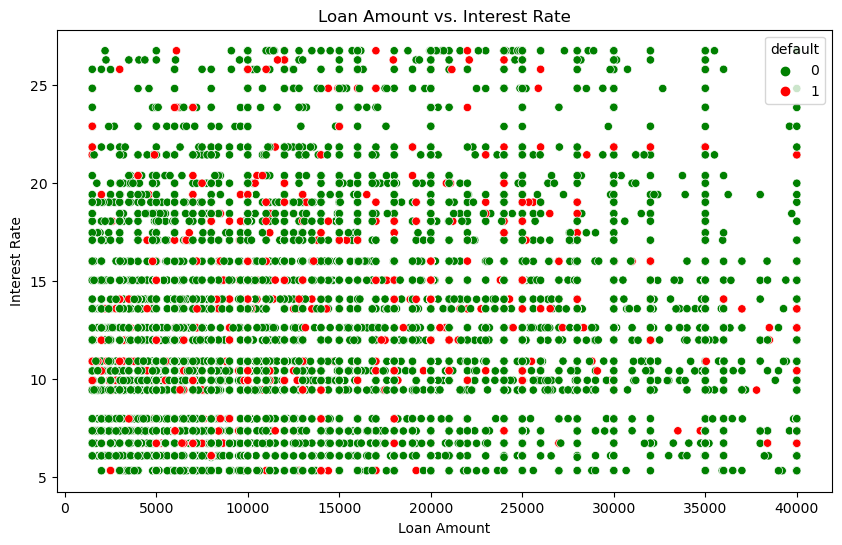

In [33]:
# Scatter Plot of Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_int, x='loan_amount', y='interest_rate', hue='default', palette=['green', 'red'])
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

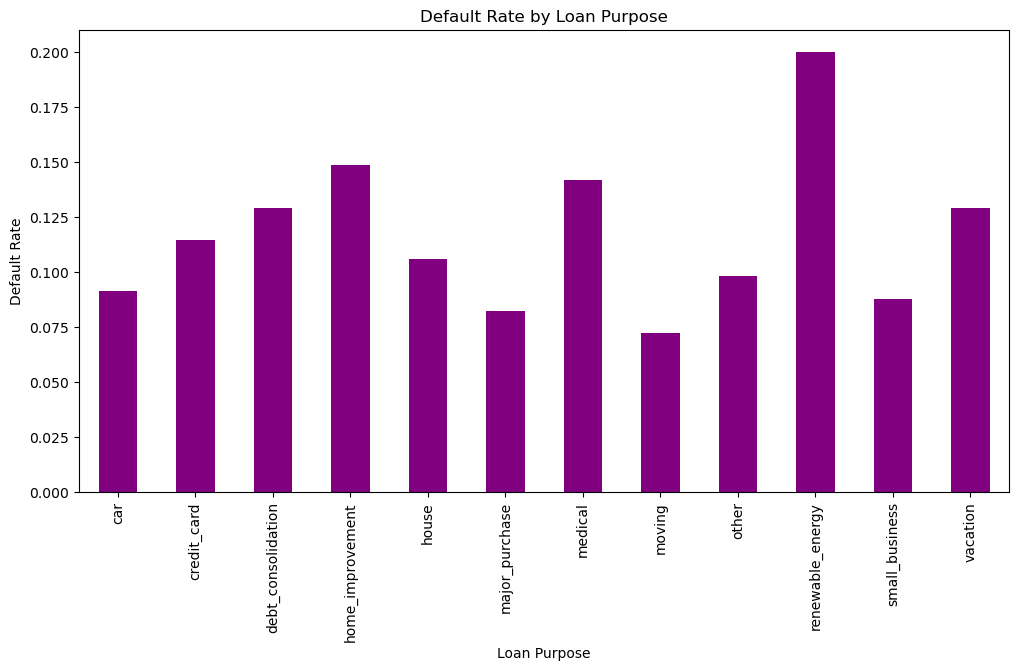

In [34]:
# Bar Chart of Default Rate by Loan Purpose
default_rate_by_purpose = df.groupby('loan_purpose')['default'].mean()
plt.figure(figsize=(12, 6))
default_rate_by_purpose.plot(kind='bar', color='purple')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.show()

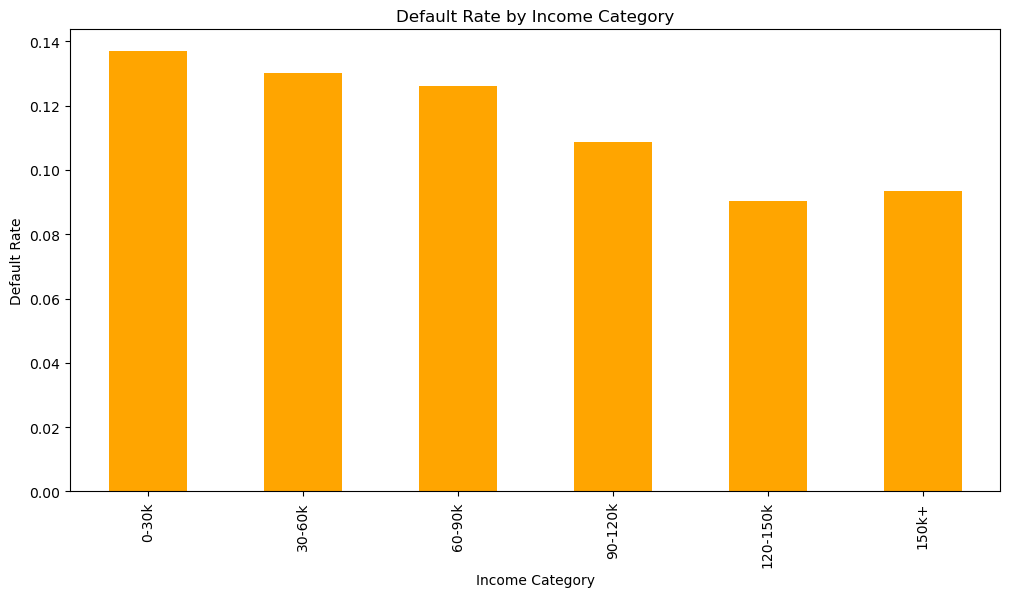

In [35]:
# Bar Chart of Default Rate by Income Category
df['income_category'] = pd.cut(df['annual_income'], bins=[0, 30000, 60000, 90000, 120000, 150000, float('inf')],
                               labels=['0-30k', '30-60k', '60-90k', '90-120k', '120-150k', '150k+'])
default_rate_by_income = df.groupby('income_category')['default'].mean()
plt.figure(figsize=(12, 6))
default_rate_by_income.plot(kind='bar', color='orange')
plt.title('Default Rate by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Default Rate')
plt.show()

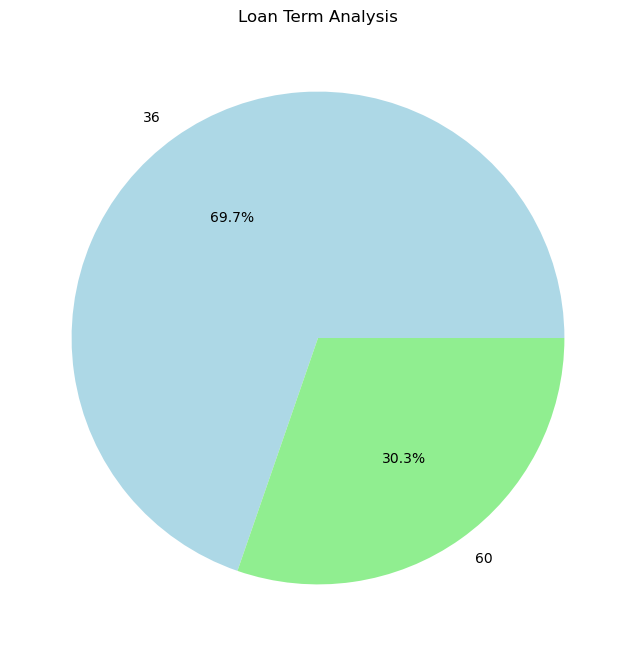

In [36]:
# Pie Chart of Loan Terms
plt.figure(figsize=(8, 8))
df_int['term'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Loan Term Analysis')
plt.ylabel('')
plt.show()

In [37]:
df_obj.nunique()

emp_title                 4741
state                       50
homeownership                3
verified_income              3
loan_purpose                12
application_type             2
grade                        7
sub_grade                   32
issue_month                  3
loan_status                  6
initial_listing_status       2
disbursement_method          2
dtype: int64

In [38]:
df_obj.head()

emp_title state homeownership  verified_income  \
0  global config engineer     NJ      MORTGAGE         Verified   
1   warehouse office clerk    HI          RENT     Not Verified   
2                 assembly    WI          RENT  Source Verified   
3         customer service    PA          RENT     Not Verified   
4     security supervisor     CA          RENT         Verified   

         loan_purpose application_type grade sub_grade issue_month  \
0              moving       individual     C        C3    Mar-2018   
1  debt_consolidation       individual     C        C1    Feb-2018   
2               other       individual     D        D1    Feb-2018   
3  debt_consolidation       individual     A        A3    Jan-2018   
4         credit_card            joint     C        C3    Mar-2018   

  loan_status initial_listing_status disbursement_method  
0     Current                  whole                Cash  
1     Current                  whole                Cash  
2     Current             fractional                Cash  
3     Current                  whole                Cash  
4     Current                  whole                Cash

In [39]:
# Initialize the LabelEncoder
label_encoders = {col: LabelEncoder() for col in df_obj.columns}

In [40]:
# Apply LabelEncoder to each categorical column
for col, le in label_encoders.items():
    df_obj[col] = le.fit_transform(df_obj[col])

In [41]:
data_new = pd.concat([df_int, df_obj], axis=1)

In [42]:
data_new.head()

emp_length  annual_income  debt_to_income  delinq_2y  earliest_credit_line  \
0         3.0        90000.0           18.01          0                  2001   
1        10.0        40000.0            5.04          0                  1996   
2         3.0        40000.0           21.15          0                  2006   
3         1.0        30000.0           10.16          0                  2007   
4        10.0        35000.0           57.96          0                  2008   

   inquiries_last_12m  total_credit_lines  open_credit_lines  \
0                   6                  28                 10   
1                   1                  30                 14   
2                   4                  31                 10   
3                   0                   4                  4   
4                   7                  22                 16   

   total_credit_limit  total_credit_utilized  ...  homeownership  \
0             70795.0                38767.0  ...              0   
1             28800.0                 4321.0  ...              2   
2             24193.0                16000.0  ...              2   
3             25400.0                 4997.0  ...              2   
4             69839.0                52722.0  ...              2   

   verified_income  loan_purpose  application_type  grade  sub_grade  \
0                2             7                 0      2         12   
1                0             2                 0      2         10   
2                1             8                 0      3         15   
3                0             2                 0      0          2   
4                2             1                 1      2         12   

   issue_month  loan_status  initial_listing_status  disbursement_method  
0            2            1                       1                    0  
1            0            1                       1                    0  
2            0            1                       0                    0  
3            1            1                       1                    0  
4            2            1                       1                    0  

[5 rows x 50 columns]

In [43]:
data_new.shape

(10000, 50)

In [44]:
len(data_new.columns)

50

In [45]:
data_new.columns

Index(['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_120d_past_due', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'default', 'loan_amount',
       'term', 'interest_rate', 'installment', 'balance', 'paid_total',
       'paid_principal', 'paid_interest', 'paid_late_fees', 'emp_title',
       'state', 'homeownership', 'verified_income', 'loan

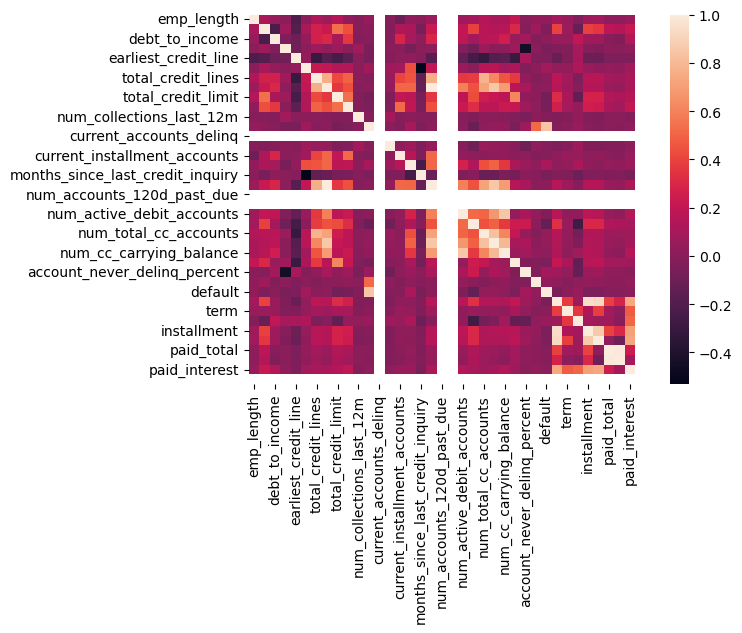

In [46]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(df_int.corr())
plt.show()

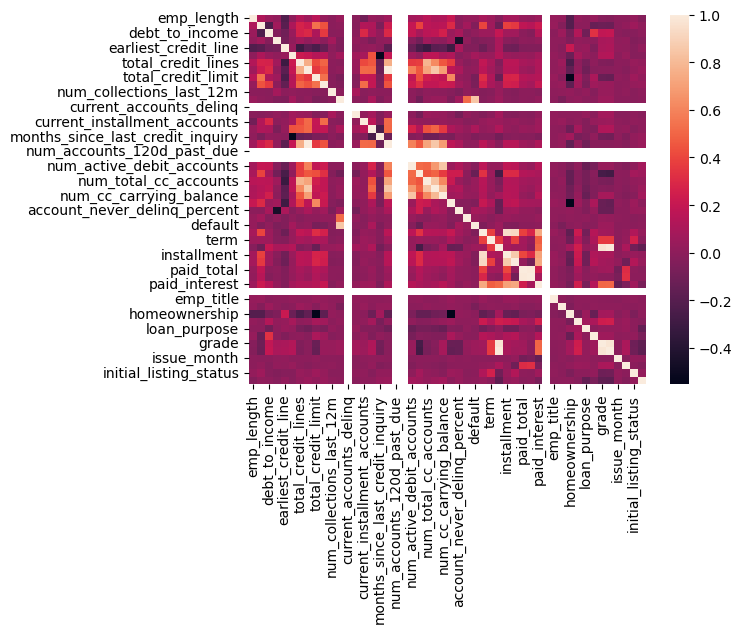

In [47]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_new.corr())
plt.show()

### Feature Selcetion

In [48]:
y_var = 'default'
x_var = data_new.columns.difference(['default'])

In [49]:
#RFE
RFR = RandomForestRegressor()
rfe = RFE(estimator = RFR,n_features_to_select = 20)
rfe = rfe.fit(data_new[x_var],data_new[y_var])

print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False False False  True False False  True  True
  True False False False False False False False  True False False  True
 False False  True False False  True False False False  True False  True
 False  True False  True  True  True False False  True  True  True  True
 False]
[ 1  6  1 21  7 27 13  1 19 23  1  1  1 18 20 22 15  3  8 10  1 11 24  1
 30 28  1  2 26  1 12  9  5  1 16  1 29  1  4  1  1  1 25 14  1  1  1  1
 17]


In [50]:
X_final = data_new[x_var[rfe.support_]]
y_final = data_new['default']

In [51]:
X_final.head()

account_never_delinq_percent  annual_income  debt_to_income  \
0                          92.9        90000.0           18.01   
1                         100.0        40000.0            5.04   
2                          93.5        40000.0           21.15   
3                         100.0        30000.0           10.16   
4                         100.0        35000.0           57.96   

   earliest_credit_line  emp_length  emp_title  loan_amount  \
0                  2001         3.0       1777        28000   
1                  1996        10.0       4675         5000   
2                  2006         3.0        207         2000   
3                  2007         1.0       1035        21600   
4                  2008        10.0       3710        23000   

   months_since_last_credit_inquiry  num_active_debit_accounts  \
0                               5.0                          2   
1                               8.0                          3   
2                               7.0                          3   
3                              15.0                          2   
4                               4.0                         10   

   num_historical_failed_to_pay  num_total_cc_accounts  paid_interest  \
0                             0                   14.0        1015.19   
1                             1                   24.0         150.49   
2                             0                   14.0         106.43   
3                             1                    3.0         566.15   
4                             0                   20.0         754.80   

   paid_principal  state  sub_grade  tax_liens  total_credit_limit  \
0          984.14     30         12          0             70795.0   
1          348.63     11         10          0             28800.0   
2          175.37     47         15          0             24193.0   
3         2746.74     37          2          1             25400.0   
4         1569.85      4         12          0             69839.0   

   total_credit_lines  total_credit_utilized  total_debit_limit  
0                  28                38767.0              11100  
1                  30                 4321.0              16500  
2                  31                16000.0               4300  
3                   4                 4997.0              19400  
4                  22                52722.0              32700

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(X_final,y_final)

In [54]:
# Display the shape of the resampled data
print(f"Original dataset shape: {y_final.shape}")
print(f"Resampled dataset shape: {Y_res.shape}")

Original dataset shape: (10000,)
Resampled dataset shape: (17570,)


In [55]:
Y_res.value_counts()

default
0    8785
1    8785
Name: count, dtype: int64

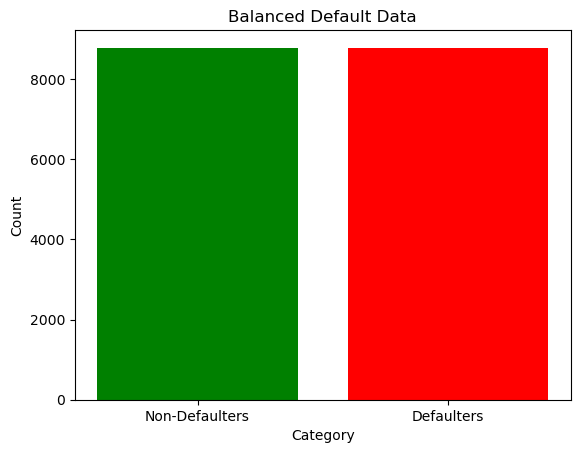

In [56]:
# Count the occurrences of each value in the 'default' column
default_counts = Y_res.value_counts()

# Bar chart
categories = ['Non-Defaulters', 'Defaulters']
values = [default_counts[0], default_counts[1]]
colors = ['green', 'red']

plt.bar(categories, values, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Balanced Default Data')
plt.show()

In [57]:
final_df = pd.concat([X_res, Y_res], axis=1)

In [58]:
final_df.head()

account_never_delinq_percent  annual_income  debt_to_income  \
0                          92.9        90000.0           18.01   
1                         100.0        40000.0            5.04   
2                          93.5        40000.0           21.15   
3                         100.0        30000.0           10.16   
4                         100.0        35000.0           57.96   

   earliest_credit_line  emp_length  emp_title  loan_amount  \
0                  2001         3.0       1777        28000   
1                  1996        10.0       4675         5000   
2                  2006         3.0        207         2000   
3                  2007         1.0       1035        21600   
4                  2008        10.0       3710        23000   

   months_since_last_credit_inquiry  num_active_debit_accounts  \
0                               5.0                          2   
1                               8.0                          3   
2                               7.0                          3   
3                              15.0                          2   
4                               4.0                         10   

   num_historical_failed_to_pay  ...  paid_interest  paid_principal  state  \
0                             0  ...        1015.19          984.14     30   
1                             1  ...         150.49          348.63     11   
2                             0  ...         106.43          175.37     47   
3                             1  ...         566.15         2746.74     37   
4                             0  ...         754.80         1569.85      4   

   sub_grade  tax_liens  total_credit_limit  total_credit_lines  \
0         12          0             70795.0                  28   
1         10          0             28800.0                  30   
2         15          0             24193.0                  31   
3          2          1             25400.0                   4   
4         12          0             69839.0                  22   

   total_credit_utilized  total_debit_limit  default  
0                38767.0              11100        0  
1                 4321.0              16500        1  
2                16000.0               4300        0  
3                 4997.0              19400        0  
4                52722.0              32700        0  

[5 rows x 21 columns]

### Splitting the data into train & test 

In [59]:
target = final_df[['default']]
features = X_res

In [60]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

###  Decision Trees

#### Fine Tuning the parameters

In [61]:
param_grid =param_grid = {
    'max_depth': np.arange(2, 10),  # Depth of the tree
    'min_samples_split': np.arange(2, 10),# Min samples required to split a node
    'max_leaf_nodes' : np.arange(2, 10)
}

In [62]:
tree = GridSearchCV( estimator = DecisionTreeClassifier( random_state = 20 ),
                param_grid = param_grid, cv = 10, 
                    scoring = 'roc_auc', 
                        n_jobs = -1,
                            verbose = True)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 512 candidates, totalling 5120 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=20),
             n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc', verbose=True)

In [63]:
tree.best_score_

0.9999783181722487

In [64]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=20)

In [65]:
tree.best_params_

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}

In [66]:
pred_train = tree.predict(train_X)

In [67]:
print(metrics.classification_report(train_y,pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6161
           1       1.00      0.99      1.00      6138

    accuracy                           1.00     12299
   macro avg       1.00      1.00      1.00     12299
weighted avg       1.00      1.00      1.00     12299



In [68]:
pred_test = tree.predict(test_X)

In [69]:
print(metrics.classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2624
           1       1.00      0.99      1.00      2647

    accuracy                           1.00      5271
   macro avg       1.00      1.00      1.00      5271
weighted avg       1.00      1.00      1.00      5271



### Building final decision tree model with best parameters

In [70]:
clf_tree = DecisionTreeClassifier( max_depth = 3, min_samples_split=2, max_leaf_nodes=4,random_state=20 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=20)

In [71]:
train_pred = clf_tree.predict(train_X)
test_pred = clf_tree.predict(test_X)

### Train dataset

In [72]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6161
           1       1.00      0.99      1.00      6138

    accuracy                           1.00     12299
   macro avg       1.00      1.00      1.00     12299
weighted avg       1.00      1.00      1.00     12299



In [73]:
train_auc_tree = metrics.roc_auc_score(train_y,train_pred)
train_auc_tree

0.9970674486803519

In [74]:
train_acc_tree = metrics.accuracy_score(train_y,train_pred)
train_acc_tree

0.9970729327587609

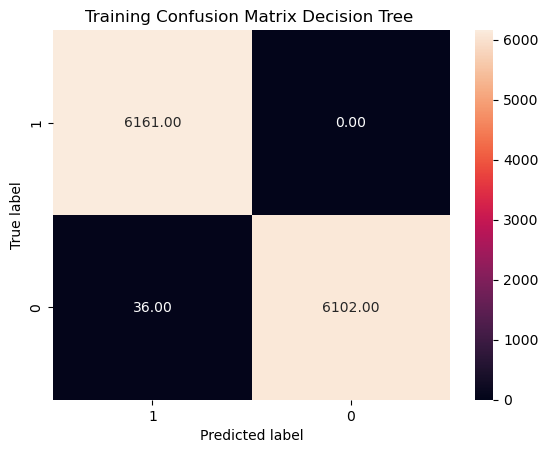

In [75]:
# confusion metrix for train data
train_cm = metrics.confusion_matrix(train_y, train_pred)
sns.heatmap(train_cm, annot = True, fmt = '.2f',
                xticklabels = ["1", "0"] , 
                    yticklabels = ["1", "0"])
plt.title('Training Confusion Matrix Decision Tree ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Testing dataset

In [76]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2624
           1       1.00      0.99      1.00      2647

    accuracy                           1.00      5271
   macro avg       1.00      1.00      1.00      5271
weighted avg       1.00      1.00      1.00      5271



In [77]:
test_auc_tree = metrics.roc_auc_score(test_y,test_pred)
test_auc_tree

0.9973554967888175

In [78]:
test_acc_tree = metrics.accuracy_score(test_y,test_pred)
test_acc_tree

0.99734395750332

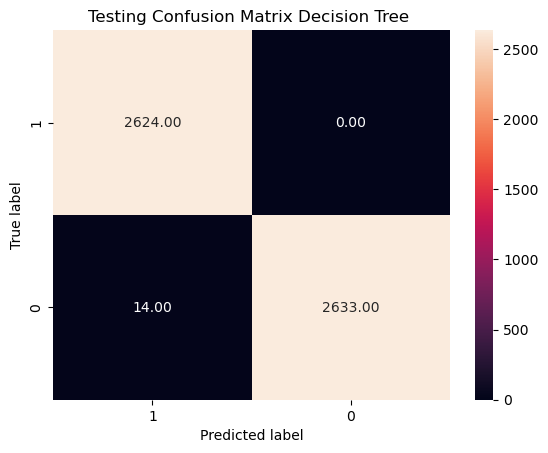

In [79]:
# confusion metrix for test data
test_cm = metrics.confusion_matrix(test_y, test_pred)
sns.heatmap(test_cm, annot = True, fmt = '.2f',
                xticklabels = ["1", "0"] , 
                    yticklabels = ["1", "0"])
plt.title('Testing Confusion Matrix Decision Tree ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### BUILDING RANDOM FOREST MODEL

In [80]:
pargrid_rf = { 'n_estimators': [50, 75, 90, 100, 120, 150],
                  'max_features': [6, 7, 8, 9] }

gscv_rf = GridSearchCV(estimator = RandomForestClassifier( random_state = 1 ), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = 10, 
                        scoring = 'roc_auc',
                        n_jobs = -1).fit(train_X, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\mehta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [81]:
gscv_rf.best_params_

{'max_features': 6, 'n_estimators': 150}

In [82]:
gscv_rf.best_score_

0.9999827436773423

### Final Random Forest model with best parameters

In [83]:
radm_clf = RandomForestClassifier(n_estimators=150,
                                  max_features=6,
                                  n_jobs=-1,random_state=123).fit(train_X,train_y)

C:\Users\mehta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [84]:
train_pred_rf = radm_clf.predict(train_X)
test_pred_rf = radm_clf.predict(test_X)

In [85]:
print("Model Performance")
print("Train Dataset")
train_Acc_rf = metrics.accuracy_score(train_y, train_pred_rf).round(2)
print("Accuracy : ", train_Acc_rf)
print(metrics.classification_report(train_y, train_pred_rf))
train_auc_rf = metrics.roc_auc_score(train_y, train_pred_rf).round(3)
print("ROC-AUC Score: ",train_auc_rf)

Model Performance
Train Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6161
           1       1.00      1.00      1.00      6138

    accuracy                           1.00     12299
   macro avg       1.00      1.00      1.00     12299
weighted avg       1.00      1.00      1.00     12299

ROC-AUC Score:  1.0


In [86]:
print("Model Performance")
print("Test Dataset")
test_Acc_rf = metrics.accuracy_score(test_y, test_pred_rf).round(2)
print("Accuracy : ", test_Acc_rf)
print(metrics.classification_report(test_y, test_pred_rf))
test_auc_rf = metrics.roc_auc_score(test_y, test_pred_rf).round(3)
print("ROC-AUC Score: ",test_auc_rf)

Model Performance
Test Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2624
           1       1.00      1.00      1.00      2647

    accuracy                           1.00      5271
   macro avg       1.00      1.00      1.00      5271
weighted avg       1.00      1.00      1.00      5271

ROC-AUC Score:  0.998


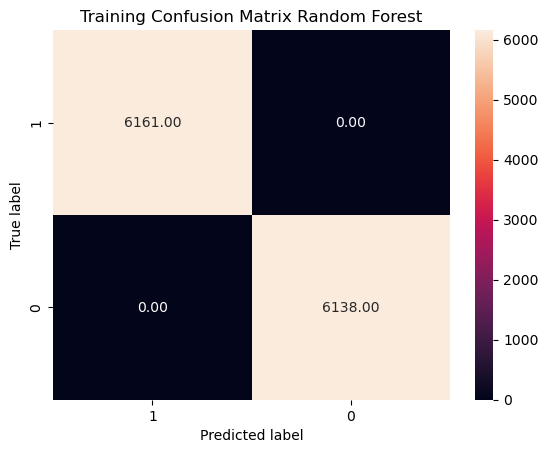

In [87]:
# confusion metrix for training data
confusion_matrix = metrics.confusion_matrix(train_y, train_pred_rf)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f',
                xticklabels = ["1", "0"] , 
                    yticklabels = ["1", "0"])

plt.title('Training Confusion Matrix Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

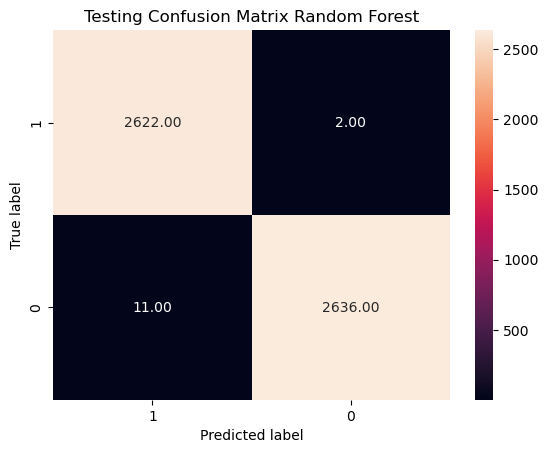

In [88]:
# confusion metrix for test data
confusion_metrix = metrics.confusion_matrix(test_y, test_pred_rf)
sns.heatmap(confusion_metrix, annot = True, fmt = '.2f',
                xticklabels = ["1", "0"] , 
                    yticklabels = ["1", "0"])

plt.title('Testing Confusion Matrix Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Feature importance from the Random Forest Model

In [89]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

<Axes: xlabel='importance', ylabel='feature'>

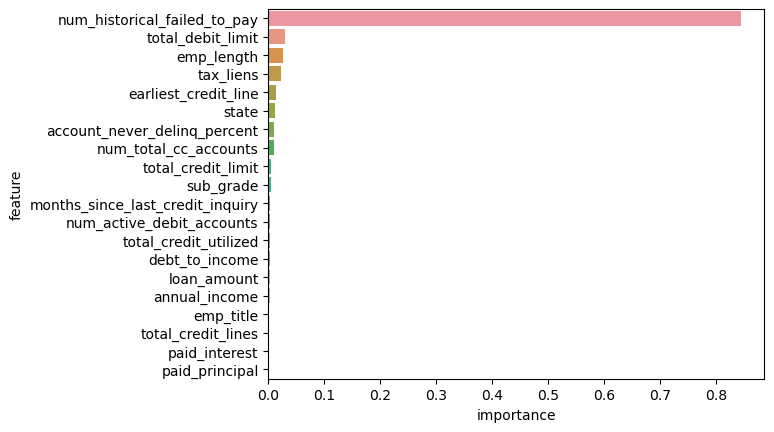

In [90]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

### Selecting Top 10 Features

In [91]:
top_10 = list(feature_rank['feature'].head(10))

In [92]:
X_final.shape

(10000, 20)

In [93]:
X = X_final[top_10]
X_train, X_test, y_train, y_test = train_test_split(X,y_final, test_size=0.3, random_state=123)

In [94]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7000, 10) (7000,)
(3000, 10) (3000,)


### Adda Boost

In [95]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [96]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier( random_state = 1),
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)
gscv_ada.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [98]:
print(gscv_ada.best_params_)
print(gscv_ada.best_estimator_)
print(gscv_ada.best_score_)

{'learning_rate': 1, 'n_estimators': 200}
AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)
0.9971428571428571


### Addaboost With best params

In [99]:
ad=AdaBoostClassifier(learning_rate = 1, n_estimators=200,random_state = 1)
ad.fit(X_train, y_train )

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)

In [100]:
test_pred_ad = ad.predict(X_test)
train_pred_ad = ad.predict(X_train)

In [101]:
print("Model Performance")
print("Train Dataset")
train_acc_ad = metrics.accuracy_score(y_train, train_pred_ad).round(2)
print("Accuracy : ", train_acc_ad)
print(metrics.classification_report(y_train, train_pred_ad))
train_auc_ad = metrics.roc_auc_score(y_train, train_pred_ad).round(3)
print("ROC-AUC Score: ",train_auc_ad)

Model Performance
Train Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00       862

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

ROC-AUC Score:  1.0


In [102]:
print("Model Performance")
print("Test Dataset")
test_acc_ad = metrics.accuracy_score(y_test, test_pred_ad).round(2)
print("Accuracy : ", test_acc_ad)
print(metrics.classification_report(y_test, test_pred_ad))
test_auc_ad = metrics.roc_auc_score(y_test, test_pred_ad).round(3)
print("ROC-AUC Score: ",test_auc_ad)

Model Performance
Test Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2647
           1       0.97      0.99      0.98       353

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.99      3000
weighted avg       1.00      0.99      1.00      3000

ROC-AUC Score:  0.992


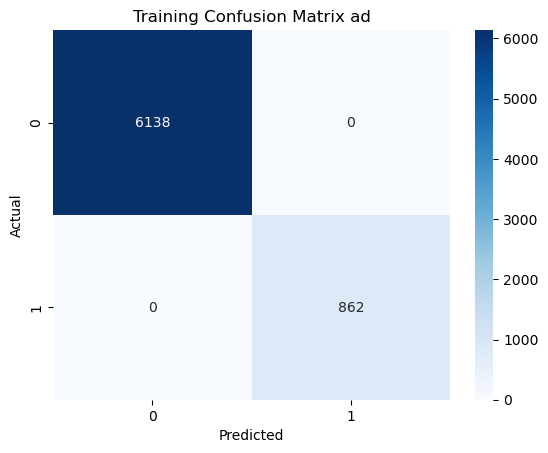

In [103]:
plt.title('Training Confusion Matrix ad')
confusion_matrix = pd.crosstab(y_train, train_pred_ad, rownames=['Actual'], colnames=['Predicted']).round(1)
sns.heatmap(confusion_matrix, annot=True,fmt='g',cmap = 'Blues')
plt.show()

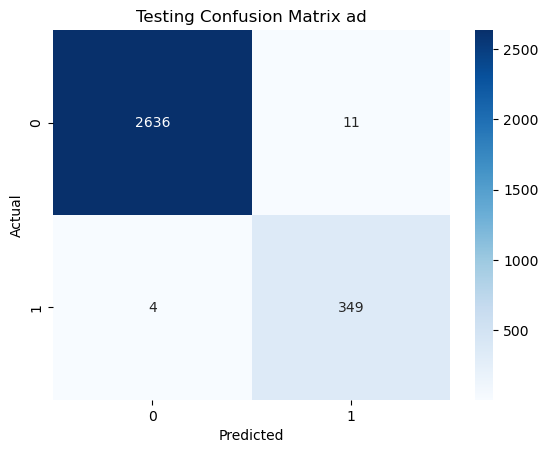

In [104]:
plt.title('Testing Confusion Matrix ad')
confusion_metrix = pd.crosstab(y_test, test_pred_ad, rownames=['Actual'], colnames=['Predicted']).round(1)
sns.heatmap(confusion_metrix, annot=True,fmt='g',cmap = 'Blues')
plt.show()

### K-Nearest Neighbors

##### Important Tuning Parameters for KNN: 
- n_neighbors - The number of nearest neighbors K in the K-NN algorithm
- weights - weight function used in predictions.

In [105]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_data = sc.fit_transform(X_train)

In [107]:
std_data_train = pd.DataFrame(std_data, columns=X_train.columns, index = X_train.index )
std_data_train.shape

(7000, 10)

In [108]:
std_data_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index = X_test.index)
std_data_test.shape

(3000, 10)

In [110]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[7,8,9,10,11,12,13,14,15,16,17],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), 
                     param_grid = param_grid,
                     cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, y_train)

In [111]:
model.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [112]:
model.best_score_

0.9962870863470268

### Final knn with best parameters

In [113]:
knn = KNeighborsClassifier(n_neighbors=7,weights='distance')
knn.fit(std_data_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [114]:
train_pred_knn = knn.predict(std_data_train)
test_pred_knn = knn.predict(std_data_test)

In [115]:
print("Model Performance")
print("Train Dataset")
train_acc_knn = metrics.accuracy_score(y_train, train_pred_knn).round(2)
print("Accuracy : ", train_acc_knn)
print(metrics.classification_report(y_train, train_pred_knn))
train_auc_knn = metrics.roc_auc_score(y_train, train_pred_knn).round(3)
print("ROC-AUC Score: ",train_auc_knn)

Model Performance
Train Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00       862

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

ROC-AUC Score:  1.0


In [116]:
print("Model Performance")
print("Test Dataset")
test_acc_knn = metrics.accuracy_score(y_test, test_pred_knn).round(2)
print("Accuracy : ", test_acc_knn)
print(metrics.classification_report(y_test, test_pred_knn))
test_auc_knn = metrics.roc_auc_score(y_test, test_pred_knn).round(3)
print("ROC-AUC Score: ",test_auc_knn)

Model Performance
Test Dataset
Accuracy :  0.99
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2647
           1       0.96      0.99      0.97       353

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

ROC-AUC Score:  0.991


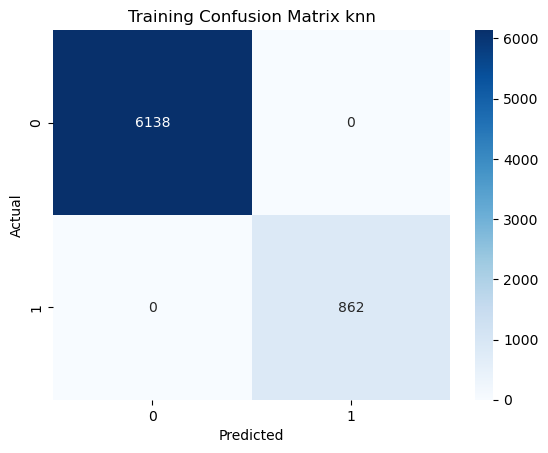

In [117]:
plt.title('Training Confusion Matrix knn')
confusion_matrix = pd.crosstab(y_train, train_pred_knn, rownames=['Actual'], colnames=['Predicted']).round(1)
sns.heatmap(confusion_matrix, annot=True,fmt='g',cmap = 'Blues')
plt.show()

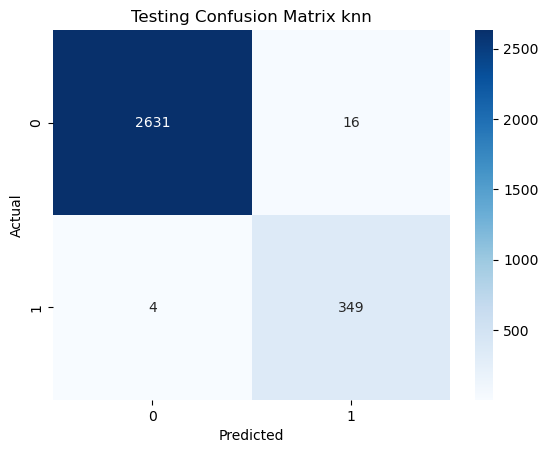

In [118]:
plt.title('Testing Confusion Matrix knn')
confusion_matrix = pd.crosstab(y_test, test_pred_knn, rownames=['Actual'], colnames=['Predicted']).round(1)
sns.heatmap(confusion_matrix, annot=True,fmt='g',cmap = 'Blues')
plt.show()

## Artificial Neural Networks (ANN) using Keras

In [119]:
pip install tf_keras 

Note: you may need to restart the kernel to use updated packages.


In [120]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [121]:
#Initializing Neural Network
classifier = Sequential()

In [122]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 30,activation = 'relu', input_dim = 10))
# Adding the second hidden layer
classifier.add(Dense(units = 30, activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

C:\Users\mehta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [124]:
# Fitting our model 
classifier.fit(std_data_train, y_train, batch_size = 10, epochs = 150)

Epoch 1/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8693 - loss: 0.2855
Epoch 2/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.9962 - loss: 0.0095
Epoch 3/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.9977 - loss: 0.0061
Epoch 4/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.9968 - loss: 0.0071
Epoch 5/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9971 - loss: 0.0061
Epoch 6/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9964 - loss: 0.0071
Epoch 7/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9982 - loss: 0.0045
Epoch 8/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9958 - loss: 0.0083
Epoch 9/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9977 - loss: 0.0055
Epoch 10/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.9980 - loss: 0.0053
Epoch 11/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.9980 - loss: 0.0050
Epoch 12/150
700/700 ━━━━━━━━━━

700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9997 - loss: 5.5764e-04
Epoch 68/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9994 - loss: 0.0012
Epoch 69/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9997 - loss: 7.8114e-04
Epoch 70/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 5.8320e-04
Epoch 71/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.8163e-04
Epoch 72/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 6.1905e-04
Epoch 73/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9998 - loss: 3.6218e-04
Epoch 74/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 3.6102e-04
Epoch 75/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 3.2017e-04
Epoch 76/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9998 - loss: 0.0023
Epoch 77/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9998 - loss: 5.1333e-04
Epoch 78/

700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 9.3927e-06
Epoch 132/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.2496e-05
Epoch 133/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 6.9576e-06
Epoch 134/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.7652e-06
Epoch 135/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.9885e-06
Epoch 136/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.2423e-06
Epoch 137/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.3601e-06
Epoch 138/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.1520e-05
Epoch 139/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.2079e-04
Epoch 140/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.0891e-04
Epoch 141/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.

In [125]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,875 (15.14 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,584 (10.10 KB)

In [126]:
classifier.get_weights()

[array([[ 8.90082836e-01, -4.51092809e-01, -9.69576836e-03,
          2.20622450e-01, -7.64651954e-01, -3.84049594e-01,
         -1.18556511e+00,  5.85444450e-01,  2.56719321e-01,
         -9.42264080e-01,  3.70274872e-01,  1.49163976e-01,
          1.13265380e-01,  4.49047893e-01,  9.28237379e-01,
         -4.81468469e-01,  5.04491746e-01,  5.56796849e-01,
         -6.60252094e-01, -4.45618600e-01, -7.25956857e-01,
         -1.69830352e-01,  4.54477936e-01,  4.62893844e-01,
         -1.46852195e-01,  1.09510489e-01, -5.95762670e-01,
          2.79814839e-01, -1.94508255e-01,  5.93203068e-01],
        [-7.45329782e-02,  1.21169768e-01,  1.32984027e-01,
         -8.13241184e-01,  1.98454887e-01,  1.11985311e-03,
         -6.09175563e-01, -2.70985991e-01,  4.36025590e-01,
          1.19427651e-01,  1.78314820e-01, -5.16714454e-01,
         -1.18049793e-01,  2.27392808e-01, -2.86524028e-01,
          5.27239621e-01,  7.46135265e-02, -1.73068702e-01,
         -3.55609179e-01,  2.35171393e-

In [129]:
train_pred_ann = classifier.predict(std_data_train)
test_pred_ann = classifier.predict(std_data_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step


In [130]:
print("Model Performance")
print("Train Dataset")
train_acc_ann = metrics.accuracy_score(y_train,np.round(abs(train_pred_ann)))
print("Accuracy : ", train_acc_ann)
print(metrics.classification_report(y_train, np.round(abs(train_pred_ann))))
train_auc_ann = metrics.roc_auc_score(y_train, np.round(abs(train_pred_ann)))
print("ROC-AUC Score: ",train_auc_ann)

Model Performance
Train Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00       862

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

ROC-AUC Score:  1.0


In [131]:
print("Model Performance")
print("Test Dataset")
test_acc_ann = metrics.accuracy_score(y_test,np.round(abs(test_pred_ann)))
print("Accuracy : ", test_acc_ann)
print(metrics.classification_report(y_test, np.round(abs(test_pred_ann))))
test_auc_ann = metrics.roc_auc_score(y_test, np.round(abs(test_pred_ann)))
print("ROC-AUC Score: ",test_auc_ann)

Model Performance
Test Dataset
Accuracy :  0.9936666666666667
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2647
           1       0.96      0.99      0.97       353

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

ROC-AUC Score:  0.9915008813227011


In [132]:
training_Acc = {'Classifiers':['Decision Tree','Random Forest','Adda Boost','KNN','ANN'],
                       'Accuracy': [train_acc_tree,train_Acc_rf,train_acc_ad,train_acc_knn,train_acc_ann]}

testing_Acc = {'Classifiers':['Decision Tree','Random Forest','Adda Boost','KNN','ANN'],
                       'Accuracy': [test_acc_tree,test_Acc_rf,test_acc_ad,test_acc_knn,test_acc_ann]}

auc_train = {'Classifiers':['Decision Tree','Random Forest','Adda Boost','KNN','ANN'],
                       'AUC': [train_auc_tree,train_auc_rf,train_auc_ad,train_auc_knn,train_auc_ann]}

auc_test = {'Classifiers':['Decision Tree','Random Forest','Adda Boost','KNN','ANN'],
                       'AUC': [test_auc_tree,test_auc_rf,test_auc_ad,test_auc_knn,test_auc_ann]}

In [133]:
training_Acc = pd.DataFrame(training_Acc)
testing_Acc = pd.DataFrame(testing_Acc)
auc_train = pd.DataFrame(auc_train)
auc_test = pd.DataFrame(auc_test)

### Training Accuracies

In [134]:
training_Acc
import plotly.express as px
fig = px.bar(training_Acc, x='Classifiers', y='Accuracy',color = 'Accuracy',title='Training Accuracy')
fig.show()

### Testing Accuracies

In [135]:
testing_Acc
import plotly.express as px
fig = px.bar(testing_Acc, x='Classifiers', y='Accuracy',color='Accuracy',title='Testing Accuracy')
fig.show()

###  Training AUC Scores

In [136]:
auc_train
import plotly.express as px
fig = px.bar(auc_train, x='Classifiers', y='AUC',color='AUC',title='Training AUC')
fig.show()

### Testing AUC scores

In [137]:
auc_test
import plotly.express as px
fig = px.bar(auc_test, x='Classifiers', y='AUC',color='AUC',title='Testing AUC')
fig.show()